<a href="https://colab.research.google.com/github/sanjayk11/neural-network/blob/main/fashion_neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

data = keras.datasets.fashion_mnist

In [4]:
(train_images,train_labels), (test_images,test_labels)=data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
print(train_labels[0])

9


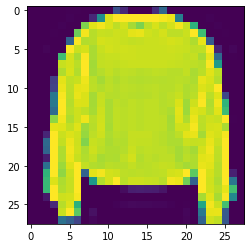

In [5]:
plt.imshow(train_images[7])
plt.show()

We reduce the pixel values from 0 to 255 to 0 to  1 for easier computation


In [6]:
train_images=train_images/255.0
test_images=test_images/255.0


In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
model = keras.Sequential([
       keras.layers.Flatten(input_shape=(28,28)),
       keras.layers.Dense(128, activation="relu"),
       keras.layers.Dense(10, activation="softmax")                   
])

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1708 - accuracy: 0.9369
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1676 - accuracy: 0.9372
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1630 - accuracy: 0.9393
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1581 - accuracy: 0.9408
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1563 - accuracy: 0.9419
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1538 - accuracy: 0.9426
Epoch 7/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1489 - accuracy: 0.9442
Epoch 8/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1441 - accuracy: 0.9461
Epoch 9/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1424 - accuracy: 0.9474
Epoch 10/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.138

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.4479 - accuracy: 0.8849

Test accuracy: 0.8848999738693237


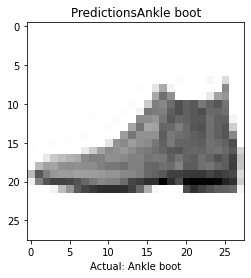

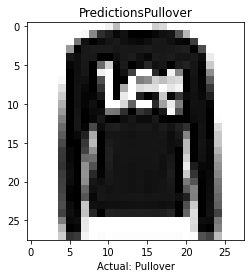

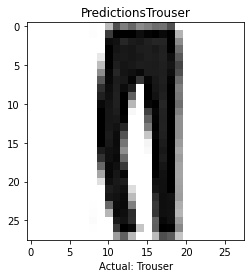

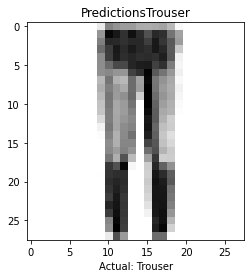

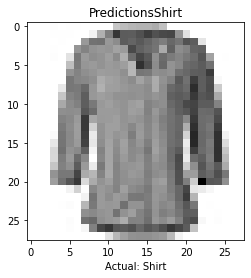

In [17]:
prediction = model.predict([test_images])

for i in range(5):
  plt.grid(False)
  plt.imshow(test_images[i],cmap=plt.cm.binary)
  plt.xlabel("Actual: "+ class_names[test_labels[i]])
  plt.title("Predictions"+ class_names[np.argmax(prediction[i])])
  plt.show()
